# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 



Define the X key features of a used car that will most significantly increase the car resale value where X is less than or equal to 5 features.

Define a model that predicts the actual sales value of the car.

Using graphs show the relationships

Define the coorelation from the key features with the remaining features.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sb 




#Plots sample autocorrelation
import statsmodels.graphics.tsaplots as tsaplots

#Stats modeling 
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from statsmodels.tsa.filters.filtertools import convolution_filter
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from warnings import filterwarnings 
filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config


In [2]:
#load data
carsDF = pd.read_csv('data/vehicles.csv')

In [3]:
#Find all null values. Evaluate impact.  Do we have enough data to fill in the missing information or need to exclude it?
carsDF.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [4]:
#Evaluate data: What are the types? 
carsDF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
#Evaluate data: Are there any numbers that are significantly higher than others?
carsDF.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


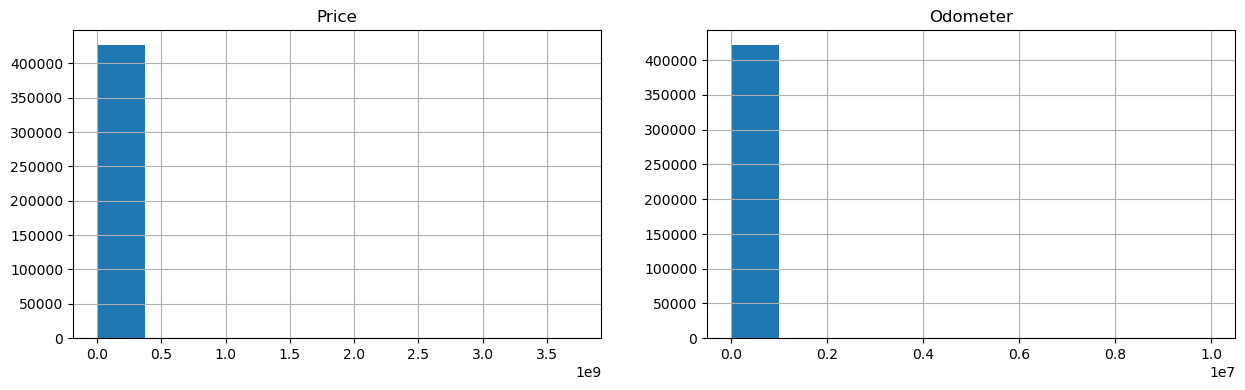

In [6]:
#Graph all values that have larger e values for max than mean to determine if  there are outliers
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(carsDF['price'])
ax[0].grid()
ax[0].set_title('Price')
ax[1].hist(carsDF['odometer'])
ax[1].grid()
ax[1].set_title('Odometer');

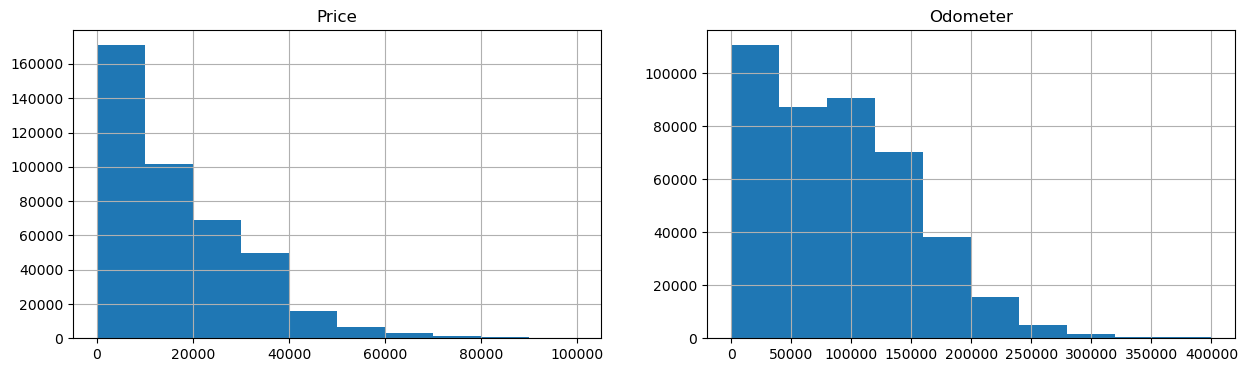

In [7]:
#Re do graph limiting data to price <=200,000 and odometer <=500,000
price_limit = 100000
odometer_limit = 400000

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(carsDF.query('(price <= 100000) and (odometer <= 400000)')['price'])
ax[0].grid()
ax[0].set_title('Price')
ax[1].hist(carsDF.query('(price <= 100000) and (odometer <= 400000)')['odometer'])
ax[1].grid()
ax[1].set_title('Odometer');

In [8]:
#Convert object values to numbers to complete correlation review

#Data has too many variations to run OneHotEncoder on all values
#Using Label Encoder for this instance

# Replace all strings with numberic codes to run analysis.
#Text data is hard to analyze trends so replacing all text with IDs in a duplicate DF. 

#convert strings to numbers
#copy df to new dataframe - so that strings can be seen using original df if needed

df= carsDF.copy(deep = True)


#find all columns with type object in the original DF so this code can be updated and rerun as needed.
obj_columns = carsDF.select_dtypes(include=['object']).columns.tolist()


print(obj_columns)

#use labelencoder from sklearn to replace the strings with a number.
label = LabelEncoder()
for i in obj_columns:
    df[i] = label.fit_transform(carsDF[i])
    
df.describe()

['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880.000000,4.268800e+05,425675.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,4.224800e+05,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000,426880.000000
mean,7.311487e+09,193.978062,7.519903e+04,2011.235191,19.763250,16898.377314,3.200112,6.032187,2.032428,9.804333e+04,0.237331,0.370479,81332.348686,1.440691,3.203343,7.583162,7.594725,23.654573
std,4.473170e+06,117.573061,1.218228e+07,9.452120,12.334898,7927.545059,2.475182,1.923536,0.805099,2.138815e+05,1.072840,0.750218,39672.075895,1.214991,1.326822,4.537213,4.513503,15.177061
min,7.207408e+09,0.000000,0.000000e+00,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.308143e+09,82.000000,5.900000e+03,2008.000000,10.000000,11171.000000,1.000000,5.000000,2.000000,3.770400e+04,0.000000,0.000000,46480.000000,0.000000,2.000000,4.000000,3.000000,9.000000
50%,7.312621e+09,197.000000,1.395000e+04,2013.000000,16.000000,17057.000000,2.000000,6.000000,2.000000,8.554800e+04,0.000000,0.000000,96177.000000,1.000000,4.000000,9.000000,9.000000,23.000000
75%,7.315254e+09,290.000000,2.648575e+04,2017.000000,31.000000,24037.000000,6.000000,8.000000,2.000000,1.335425e+05,0.000000,0.000000,118246.000000,3.000000,4.000000,11.000000,12.000000,37.000000
max,7.317101e+09,403.000000,3.736929e+09,2022.000000,42.000000,29649.000000,6.000000,8.000000,5.000000,1.000000e+07,6.000000,3.000000,118246.000000,3.000000,4.000000,13.000000,12.000000,50.000000


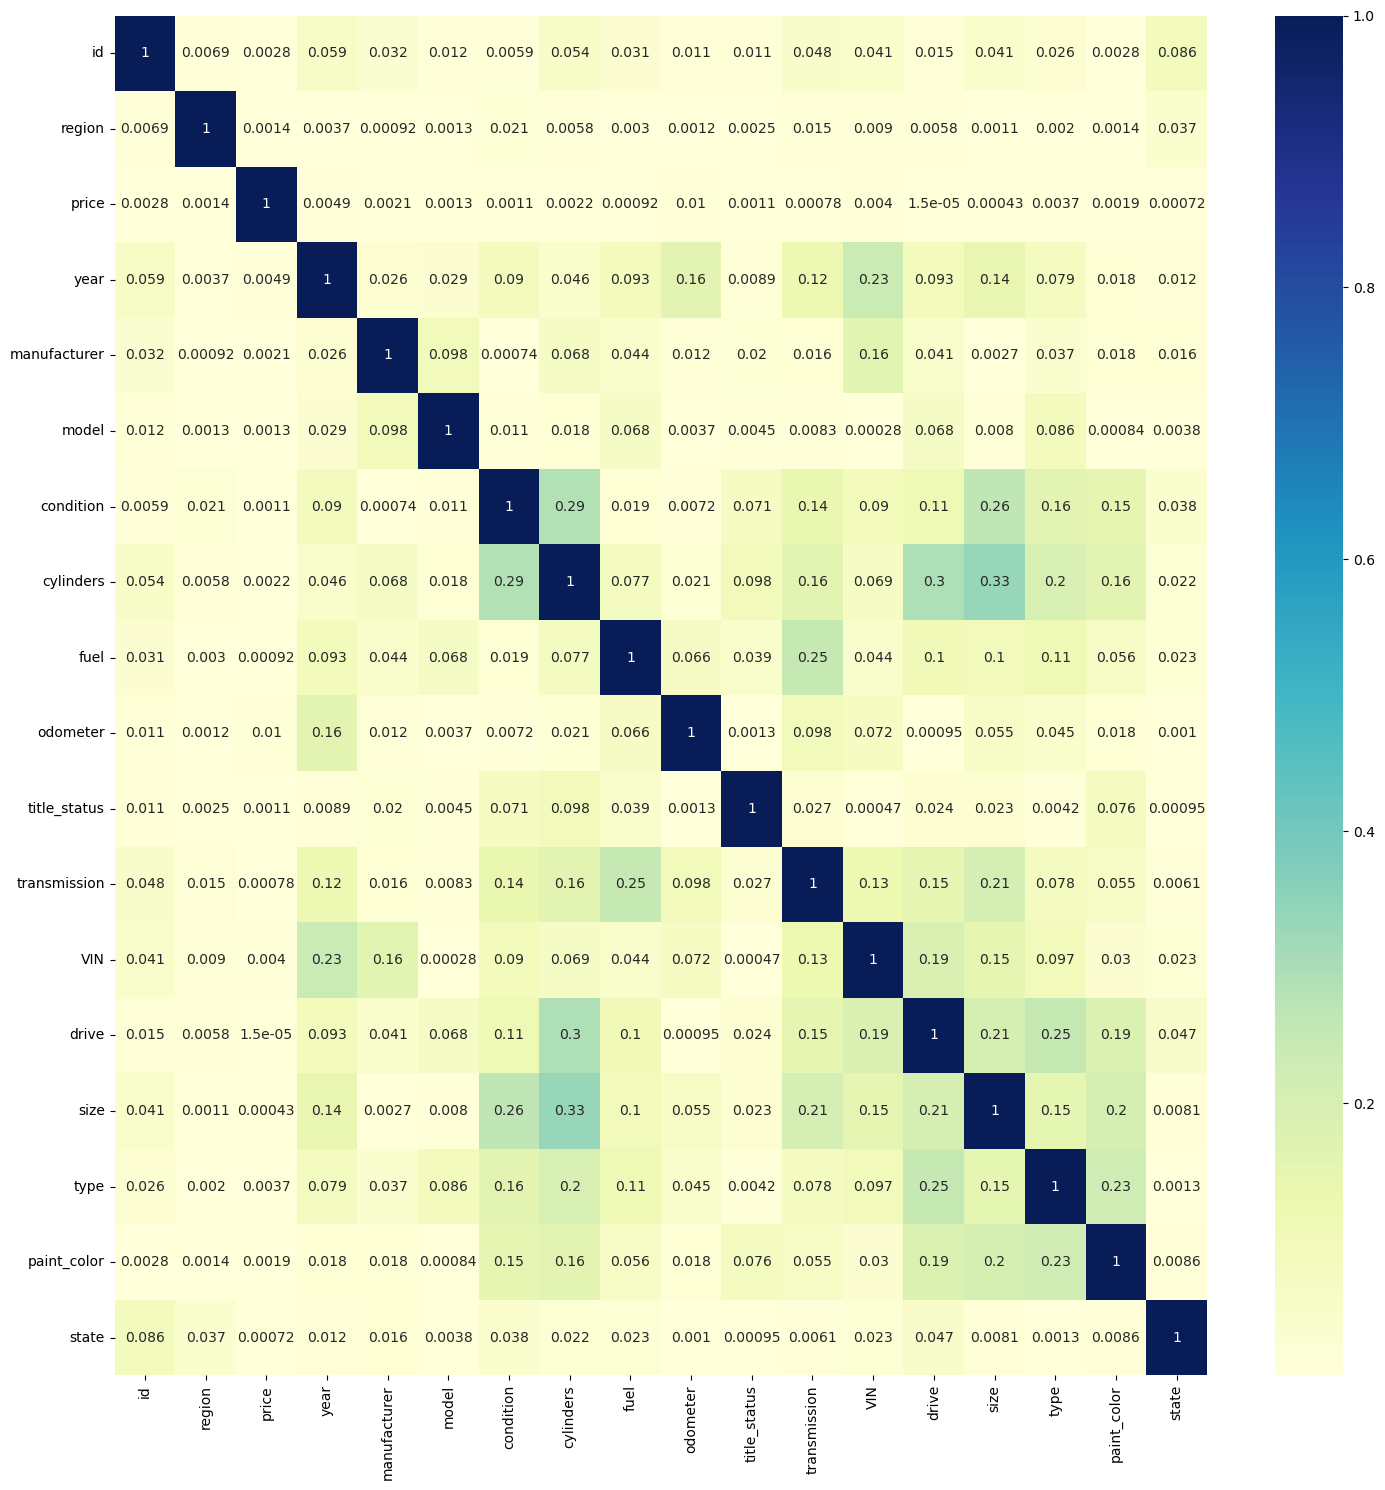

In [9]:
#Evaluate the coorelation data
carsCorr = df
  

plt.rcParams["figure.figsize"] = [15.00, 15]
plt.rcParams["figure.autolayout"] = True
plt.plot(figsize = (30, 30))
# plotting correlation heatmap 
dataplot = sb.heatmap(carsCorr.corr().abs(), cmap="YlGnBu", annot=True) 


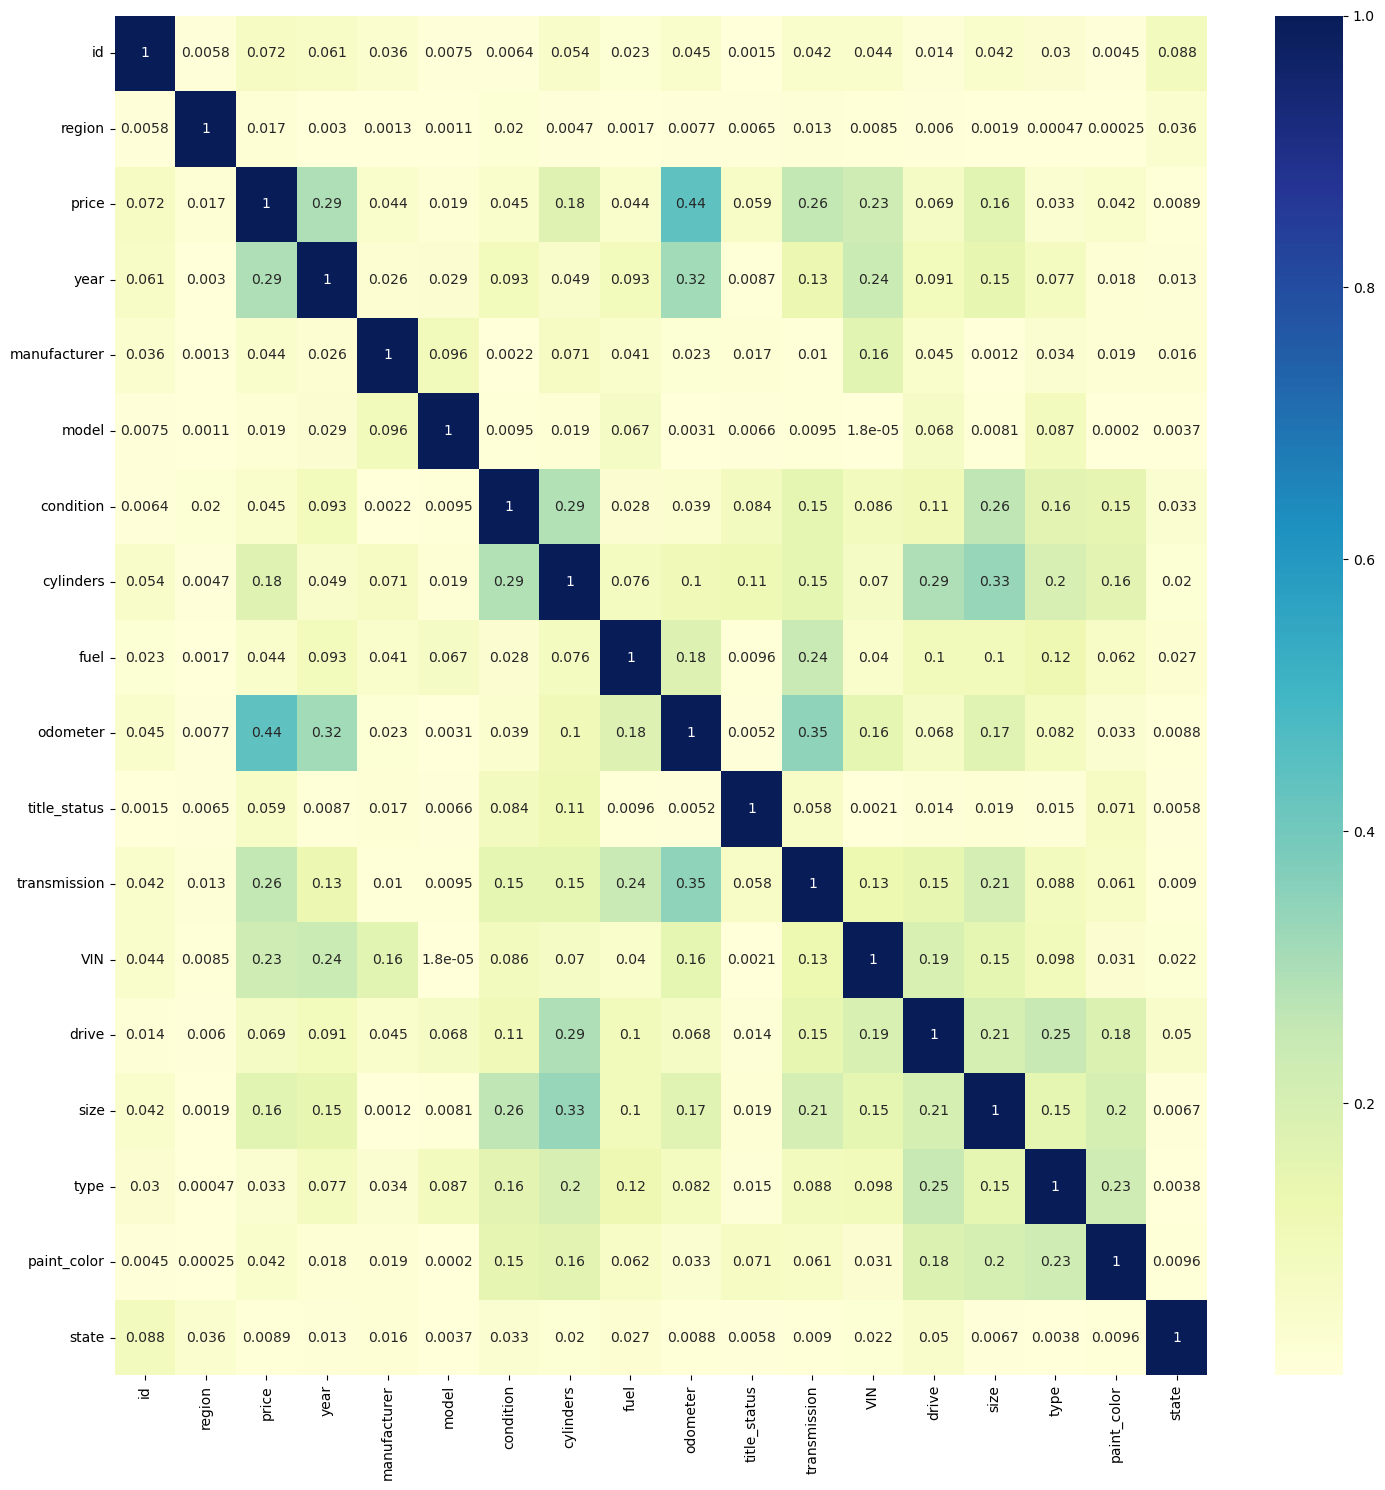

In [10]:
#remove outliers on price and odometer
carsCorrClean = df.query('(price <= 100000) and (odometer <= 400000)')
  

plt.rcParams["figure.figsize"] = [15.00, 15]
plt.rcParams["figure.autolayout"] = True
plt.plot(figsize = (30, 30))
# plotting correlation heatmap 
dataplot = sb.heatmap(carsCorrClean.corr().abs(), cmap="YlGnBu", annot=True) 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
#remove outliers:
carsDF = carsDF.query('(price <= 100000) and (odometer <= 400000)')

#convert ['drive'] nulls to 'std' for standard - this means it was likely not special and matches the standard model for the car/truck or horse trailer...
carsDF['drive'].fillna('std', inplace=True)

In [12]:
#fill in "gas" for null on ['fuel']
carsDF['fuel'].fillna('gas', inplace=True)

#fill in 'good' for ['condition'] and rank from 10 = new, 9 = like new, 8 = excellent, 5= good, 3 = fair, 1 = salvage
carsDF['condition'].fillna('good', inplace=True)
carsDF['conditionValue']= carsDF['condition'].map(({'new': 10, 'like new': 9, 'excellent': 8, 'good': 5, 'fair':4, 'salvage' : 0}))

#fill in 'unknown' for ['cylinders'] and set value to numbers
carsDF['cylinders'].fillna('unknown', inplace=True)
carsDF['cylindersValue']= carsDF['cylinders'].map(({'3 cylinders': 3, '4 cylinders': 4, 
                          '5 cylinders': 5, '6 cylinders': 6, 
                          '8 cylinders': 8, '10 cylinders' : 10,
                         '12 cylinders': 12, 'unknown':0, 'other':0}))


#fill Odometer and year as mean 
carsDF['odometer'].fillna(carsDF['odometer'].mean(), inplace=True)
carsDF['year'].fillna(round(carsDF['year'].mean()), inplace=True)

#fill title_status as 'clean'  assuming that issues would be flagged but clean titles may not be
carsDF['title_status'].fillna('clean', inplace=True)

#fill transmission as 'automatic' assuming that non-automatic cars would be flagged. 
carsDF['transmission'].fillna('automatic', inplace=True)


#fill all other null as as 'not specified' 
carsDF.fillna('not specified', inplace=True)


In [20]:
#Create age of the vehicle assuming all sales were done in 2022.
carsDF['age'] = 2022 - carsDF['year']


In [21]:
#Drop VIN, ID as they identify specific cars
#Drop year as age is more appropriate
#Drop Model as the data is too dirty to clean correctly here.
#drop region and state as correlation is very low.
#drop fields remapped to numbers
sales = carsDF.copy(deep = True)
sales.drop(columns=['VIN', 'id', 'model','year','condition','cylinders','state','region','paint_color'], axis=1, inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420140 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           420140 non-null  int64  
 1   manufacturer    420140 non-null  object 
 2   fuel            420140 non-null  object 
 3   odometer        420140 non-null  float64
 4   title_status    420140 non-null  object 
 5   transmission    420140 non-null  object 
 6   drive           420140 non-null  object 
 7   size            420140 non-null  object 
 8   type            420140 non-null  object 
 9   conditionValue  420140 non-null  int64  
 10  cylindersValue  420140 non-null  int64  
 11  age             420140 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 57.8+ MB


In [22]:
#convert fuel, title_status, transmission, drive, size, type, and paint_color to integer.
#manufacturer list is too long to effectively use onehotencoder so will drop from models and only use as filter.
# Converting type of columns to category 

# Converting type of columns to category 
sales['fuel'] = sales['fuel'].astype('category') 
sales['title_status'] = sales['title_status'].astype('category') 
sales['transmission'] = sales['transmission'].astype('category') 
sales['drive'] = sales['drive'].astype('category')
sales['size'] = sales['size'].astype('category') 
sales['type'] = sales['type'].astype('category') 

  
  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    sales[['fuel', 'title_status','transmission','drive','size','type']]).toarray(), columns=enc.get_feature_names_out()) 
  

# Merge with main 
New_df = sales.join(enc_data) 



In [23]:
#drop from new_dataframe the columns that were converted from catagories to ints
New_df.drop(columns=['manufacturer','fuel', 'title_status','transmission','drive','size','type'], axis=1,inplace = True)


In [25]:
#clean up NAN to 0 as we no longer have strings outside of the manufacture.
New_df.fillna(0, inplace=True)

#Fix data types

#find all columns with type object in the original DF
obj_columns = New_df.select_dtypes(include=['object']).columns.tolist()

#Fix the type to float
for i in obj_columns:
    New_df[i] = New_df[i].astype('float64')
    
New_df.describe()

,price,odometer,conditionValue,cylindersValue,age,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_hatchback,type_mini-van,type_not specified,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
count,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,...,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000,420140.000000
mean,17364.244611,91082.842852,5.902859,3.480673,10.723764,0.068399,0.003937,0.828371,0.012065,0.071395,...,0.038644,0.011199,0.212577,0.001397,0.050562,0.100709,0.200971,0.081711,0.019877,0.024982
std,14789.256710,62852.993805,1.497236,3.183821,9.335122,0.252429,0.062620,0.377058,0.109176,0.257484,...,0.192746,0.105230,0.409131,0.037352,0.219101,0.300944,0.400727,0.273924,0.139577,0.156071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5990.000000,37647.000000,5.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13990.000000,85134.000000,5.000000,4.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26500.000000,133000.000000,8.000000,6.000000,14.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,400000.000000,10.000000,12.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
New_df.isna().sum()

price                      0
odometer                   0
conditionValue             0
cylindersValue             0
age                        0
fuel_diesel                0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_automatic     0
transmission_manual        0
transmission_other         0
drive_4wd                  0
drive_fwd                  0
drive_rwd                  0
drive_std                  0
size_compact               0
size_full-size             0
size_mid-size              0
size_not specified         0
size_sub-compact           0
type_SUV                   0
type_bus                   0
type_convertible           0
type_coupe                 0
type_hatchback             0
type_mini-van              0
type_not speci

In [27]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420140 entries, 27 to 426879
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    420140 non-null  int64  
 1   odometer                 420140 non-null  float64
 2   conditionValue           420140 non-null  int64  
 3   cylindersValue           420140 non-null  int64  
 4   age                      420140 non-null  float64
 5   fuel_diesel              420140 non-null  float64
 6   fuel_electric            420140 non-null  float64
 7   fuel_gas                 420140 non-null  float64
 8   fuel_hybrid              420140 non-null  float64
 9   fuel_other               420140 non-null  float64
 10  title_status_clean       420140 non-null  float64
 11  title_status_lien        420140 non-null  float64
 12  title_status_missing     420140 non-null  float64
 13  title_status_parts only  420140 non-null  float64
 14  tit

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
#separate data into sets
X_train, X_test, y_train, y_test = '', '', '', ''

X_train, X_test, y_train, y_test = train_test_split(New_df.drop(columns=['price'],axis=1), New_df['price'], test_size=0.3, random_state=32)


print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(294098, 41)
(126042, 41)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [29]:
#First model attempt, use the fields high on correlation chart with linear Regression and Grid Search

In [30]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
selector_grid_lr = GridSearchCV(selector_pipe, param_grid=param_dict)


In [31]:
selector_grid_lr.fit(X_train, y_train)
train_preds_lr = selector_grid_lr.predict(X_train)
selector_lr_train_mse = mean_squared_error(y_train, train_preds_lr)

In [32]:
selector_lr_train_mse

167743809.59916857

In [33]:
best_estimator = selector_grid_lr.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid_lr.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

In [34]:
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Features from best selector: Index(['odometer', 'conditionValue', 'cylindersValue', 'age',
       'title_status_salvage', 'drive_4wd'],
      dtype='object').
Coefficient values: 


,odometer,conditionValue,cylindersValue,age,title_status_salvage,drive_4wd
model,-0.092564,-736.866068,542.825952,-293.490652,-991.3474,342.461284


In [35]:
#Would Lasso improve the model? keep the poly to only 2 degress to limit memory.
auto_pipe_lasso = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(alpha=0.5, random_state = 42))])
auto_pipe_lasso.fit(X_train, y_train)
lasso_coefs = auto_pipe_lasso.named_steps['lasso'].coef_

In [36]:
lasso_train_mse = mean_squared_error(y_train, auto_pipe_lasso.predict(X_train))
print(lasso_train_mse)

143401150.25777778


In [37]:
feature_names = auto_pipe_lasso.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})

lasso_df.loc[lasso_df['coef'] != 0]

,feature,coef
0,odometer,-8596.996434
1,conditionValue,-480.364167
2,cylindersValue,-7413.816087
3,age,-14591.387831
6,fuel_gas,-2.824803
...,...,...
793,size_sub-compact type_sedan,17.783606
794,size_sub-compact type_truck,7.162803
795,size_sub-compact type_van,-38.065791
796,size_sub-compact type_wagon,13.742821


In [38]:
lasso_df.query('(coef > 1000) or (coef< -1000)')

,feature,coef
0,odometer,-8596.996434
2,cylindersValue,-7413.816087
3,age,-14591.387831
41,odometer^2,4312.916448
42,odometer conditionValue,1318.841670
43,odometer cylindersValue,-2377.883809
44,odometer age,1795.232517
82,conditionValue^2,-1469.579289
84,conditionValue age,3393.795639
122,cylindersValue^2,11584.418031


In [40]:
#test with the scaler /lasso
model_selector_pipe_lasso = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
model_selector_pipe_lasso.fit(X_train, y_train)
model_selector_pipe_coefs = model_selector_pipe_lasso.named_steps['lasso'].coef_

In [41]:
selector_train_mse = mean_squared_error(y_train, model_selector_pipe_lasso.predict(X_train))
print(selector_train_mse)

143402983.35320395


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [142]:
#Given the two models, age, odometer, and condition are inversely related to the value. This does not make follow expected
#results for condition until you see the large impact of the salvage in the title column.  
#Data changes - age and odometer should be inversed. 
# Salavage condition should be set to -10 to contradict new and all other values should shift to 1/0 respectively.

In [143]:
Final_cars_df = New_df.copy(deep=True)


In [144]:
#Revised Condidion values {'new': 10, 'like new': 9 - > 9, 'excellent': 8 - > 7, 'good': 5 -> 2, 'fair':0 - > -5,
# 'salvage' : 0 - > -10}))

Final_cars_df['conditionValue']= New_df['conditionValue'].map(({10:10,  9:9, 8:7, 5:2, 4:-5, 0:-10}))


In [145]:
Final_cars_df['age_inv'] = 0-(New_df['age'])


In [146]:
Final_cars_df['odo_inv'] = 0-(New_df['odometer'])

#Final_cars_df.drop(columns=['age','odometer'],inplace=True)

In [147]:
#drop all not specified columns
Final_cars_df.drop(columns=['size_not specified', 'type_not specified', 'size_not specified'], axis=1, inplace=True)

#drop age and odmeter
Final_cars_df.drop(columns=['age','odometer'],inplace=True, axis=1)




In [148]:
Final_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420140 entries, 27 to 426879
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    420140 non-null  int64  
 1   conditionValue           420140 non-null  int64  
 2   cylindersValue           420140 non-null  int64  
 3   fuel_diesel              420140 non-null  float64
 4   fuel_electric            420140 non-null  float64
 5   fuel_gas                 420140 non-null  float64
 6   fuel_hybrid              420140 non-null  float64
 7   fuel_other               420140 non-null  float64
 8   title_status_clean       420140 non-null  float64
 9   title_status_lien        420140 non-null  float64
 10  title_status_missing     420140 non-null  float64
 11  title_status_parts only  420140 non-null  float64
 12  title_status_rebuilt     420140 non-null  float64
 13  title_status_salvage     420140 non-null  float64
 14  tra

In [149]:
#Update test and train data sets
X_train, X_test, y_train, y_test = '', '', '', ''

X_train, X_test, y_train, y_test = train_test_split(Final_cars_df.drop(columns=['price'],axis=1), Final_cars_df['price'], test_size=0.3, random_state=32)


In [150]:
#Rerun selector to confirm changes


In [151]:
final_pipe_lasso = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, alpha=0.3))])
final_pipe_lasso.fit(X_train, y_train)
final_coefs = final_pipe_lasso.named_steps['lasso'].coef_

In [152]:
lasso_train_mse = mean_squared_error(y_train, final_pipe_lasso.predict(X_train))
print(lasso_train_mse)

143451380.3196362


In [153]:
feature_names = final_pipe_lasso.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': final_coefs})

In [154]:
lasso_df.query('(coef > 1000) or (coef< -1000)')

,feature,coef
0,conditionValue,-1385.838841
1,cylindersValue,-6933.026162
37,age_inv,12422.548616
38,odo_inv,7790.845981
76,conditionValue age_inv,-1399.480655
78,cylindersValue^2,11563.437850
115,cylindersValue odo_inv,2352.536375
816,age_inv^2,7625.317217
817,age_inv odo_inv,1862.458468
818,odo_inv^2,4352.758229


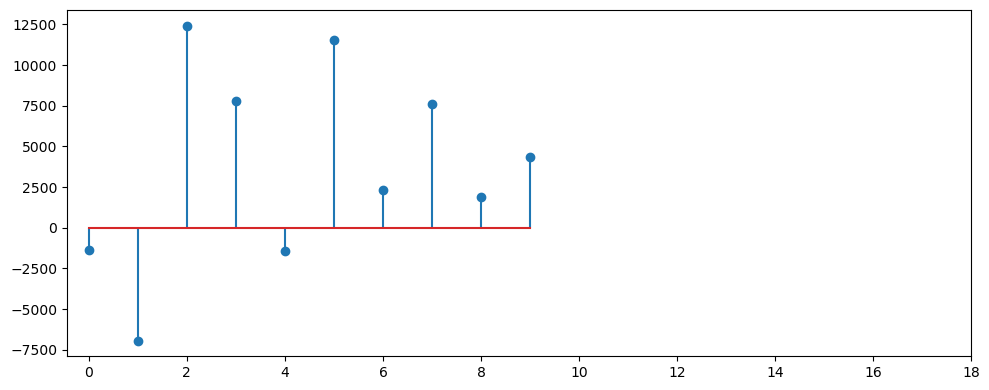

In [155]:
plt.figure(figsize = (10,4))
plt.stem(lasso_df.query('(coef > 1000) or (coef< -1000)')['coef'])
plt.xticks(ticks = range(0,20,2))
plt.show()

In [156]:
lasso_test_mse = mean_squared_error(y_test, final_pipe_lasso.predict(X_test))
print(lasso_test_mse)

142286575.26245454


In [157]:
pred = pd.DataFrame(carsDF['odometer'])
pred['age'] = 2022 - carsDF['year']
pred['prediction']= final_pipe_lasso.predict(Final_cars_df.drop(columns=['price'],axis=1))


,odometer,age,prediction
27,57923.0,8.0,28110.369689
28,71229.0,12.0,23350.018674
29,19160.0,2.0,40930.720521
30,41124.0,5.0,33698.600892
31,128000.0,9.0,12508.975337


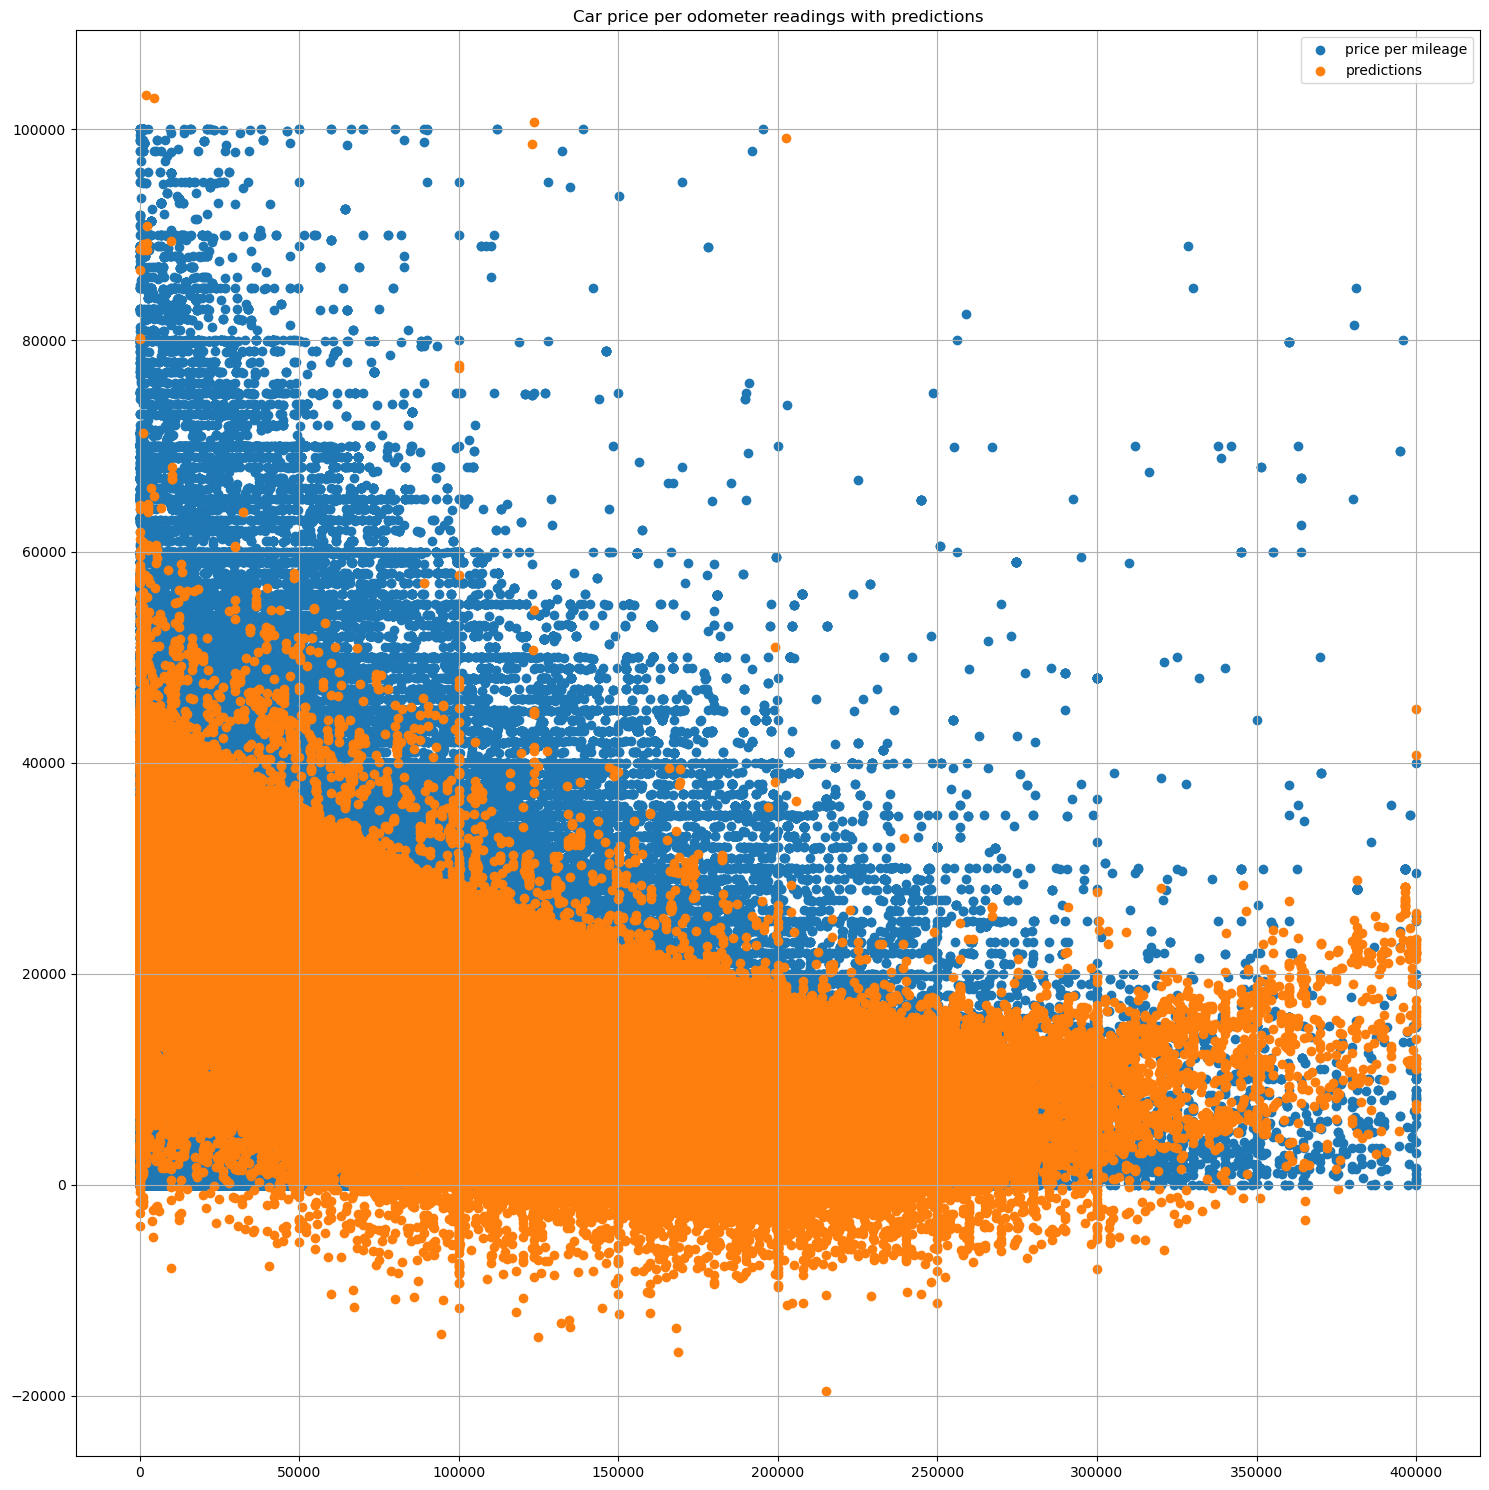

In [192]:


plt.scatter(carsDF['odometer'], carsDF['price'], label = 'price per mileage')
plt.scatter(carsDF['odometer'],pred['prediction'], label = 'predictions')
plt.title('Car price per odometer readings with predictions')
plt.legend()
plt.grid();

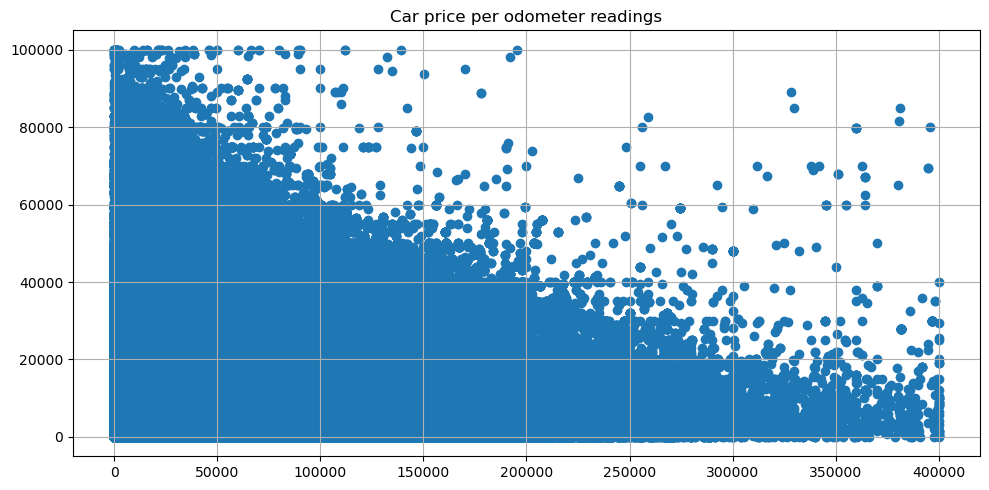

In [217]:

plt.figure(figsize=(10,5))
plt.scatter(carsDF['odometer'], carsDF['price'], label = 'price per mileage')
plt.title('Car price per odometer readings')
plt.grid();

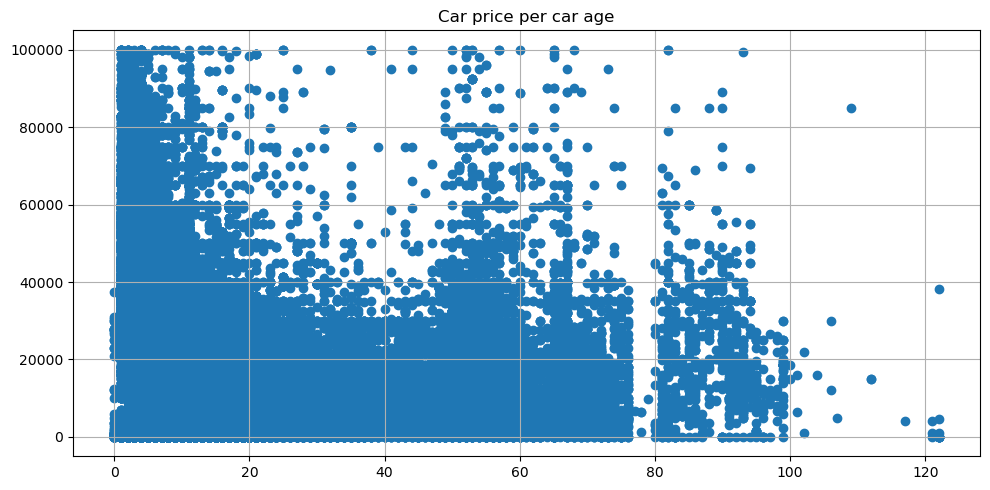

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(carsDF['age'], carsDF['price'], label = 'price per age of car')
plt.title('Car price per car age')
plt.grid();

<Axes: title={'center': 'price'}, xlabel='[drive]'>

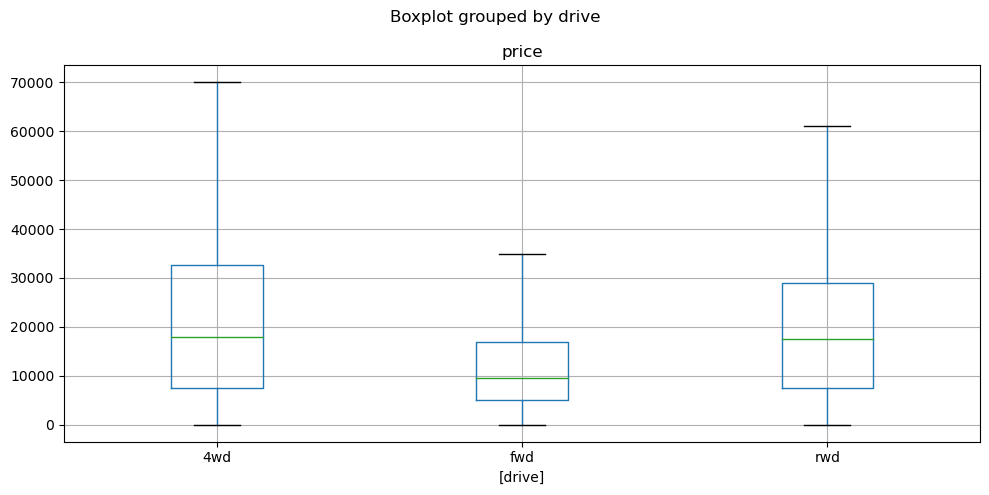

In [201]:
#create a boxplot of prices based on drive (removing the unknown)
drive_df = carsDF.query('drive != "std"')[['drive','price']]
drive_df.boxplot(by='drive', showfliers = False, figsize=(10,5))

<Axes: title={'center': 'price'}, xlabel='[condition]'>

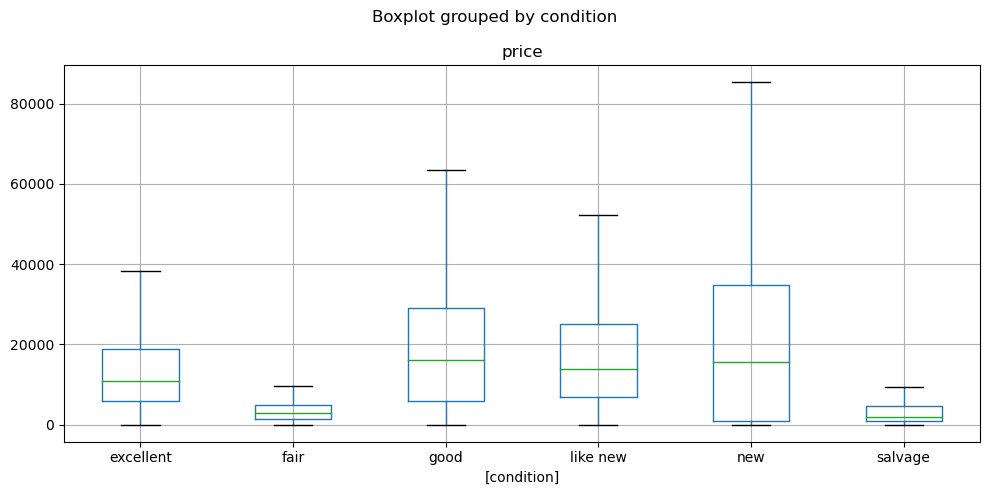

In [200]:
#create a boxplot of prices based on condition (removing the unknown)
drive_df = carsDF.query('condition != "not specified"')[['condition','price']]
drive_df.boxplot(by='condition', showfliers = False, figsize=(10,5))

<Axes: title={'center': 'price'}, xlabel='[cylinders]'>

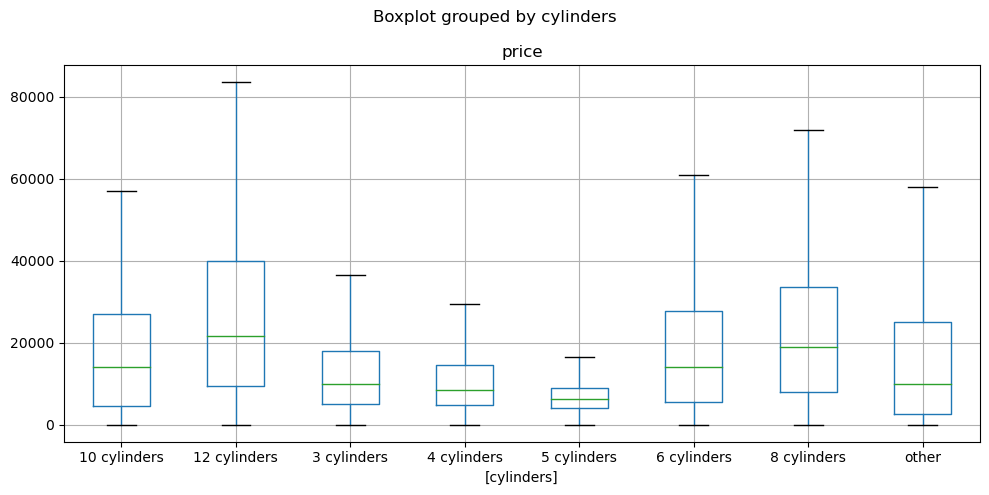

In [204]:
#create a boxplot of prices based on cylinders (removing the unknown)
drive_df = carsDF.query('cylinders != "unknown"')[['cylinders','price']]
drive_df.boxplot(by='cylinders', showfliers = False, figsize=(10,5))

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Summary 

The goal of this project was to use the data collected to determine which features made cars more valuable. 

With the data you collected, we have narrowed down the most critical aspects of a used car value to be age, odometers, cylinders, condition of the car, and drive with salvage cars having the lowest overall value. 

Below are graphs showing how the price decrease as the odometer increases and age increases. Please read further for more recommendations on drive, cylinders, and condition.  

In the analysis, we have excluded data for special purchases such as collector or high value sports cars.  These should be evaluate separately. Without the data regarding purchase price, time on lot, and negotiation changes, this data cannot be linked to which cars will provide the most profit.  


<img src = "images/car price per odometer scatter.png" width = 70%/>      
<img src = "images/car price per age scatter.png" width = 70%/>



Evaluating the car data itself, there was some incorrectly formatted data on manufacture, model, and drive (rw, fw, 4w, aw). This would need to be more precisely defined/entered to determine if there are any trends in these areas.  We did see a slight uptick on 4w drive and expect a similar uptick on aw drive if selected correctly. See box plot below.


<center>
    <img src = "images/drive boxplot by price.png" width = 70%/>
</center>


The more used the car is (with the exception of the classic models) the lower the price as indicated by age, condition, and odometer. This meets the expectation we discussed in the initial review. Evidence indicated salvaged cars had a higher impact on price than either of us expected with "fair" condition also triggering a low response.  From the data, you can see "excellent", "like new" and "good" were lower than new but there may be some judgement differences.  I recommend the sales teams align on common terms for these values.

<center>
    <img src = "images/condition boxplot.png" width = 70%/>
</center>

### Next Steps

Next steps recommended are as follows:
* Align on a common frame work for condition.  This should be measureable such as mechanical or appearance metrics that are not subjective.
* Add data regarding gas mileage
* Correct data regarding make, model, drive and manufacture year
* Add sales data such as date of sales, discounts, advertising/sales used to set sales price

Pending the improved data, you can assume that cars that are newer, in good or better condition, and have low odometer will have higher value with some preference to 4w drive. While cars that are salvage or poor condition will have lower value.